In [1]:
import pandas as pd

# Homework 2

## Apartment Prices
1. Calculation of the price per square meter (ppsqm) for each apartment sold.

In [39]:
url = "https://github.com/su-mt4007/data/blob/9e75cba44692f1e240840a6bad6cc208bb9055b3/Booli_sold.csv"
local_file_path = "/Users/nicholas/su-mt4007/HW2/Booli_sold.csv"
df = pd.read_csv(local_file_path)
df.head(6)

# Add new column (variable) "ppsqm".
df["ppsqm"] = df["listPrice"] / df["livingArea"]
df.head(5)

,listPrice,rent,livingArea,rooms,published,constructionYear,objectType,booliId,soldDate,soldPrice,...,location.position.longitude,location.position.isApproximate,location.region.municipalityName,location.region.countyName,location.distance.ocean,source.name,source.id,source.type,source.url,ppsqm
0,3995000,4467.0,73.0,3.0,2018-10-15 13:33:18,1935.0,Lägenhet,3263989,2018-11-08,3820000,...,18.054057,NaN,Stockholm,Stockholms län,260,MOHV,1901865,Broker,http://www.mohv.se/,54726.027397
1,1995000,1773.0,36.0,1.0,2018-10-05 14:29:28,1968.0,Lägenhet,3256231,2018-10-19,2355000,...,18.057821,NaN,Stockholm,Stockholms län,218,Notar,1566,Broker,http://www.notar.se/,55416.666667
2,5100000,3839.0,81.0,3.0,2018-09-11 13:44:43,1936.0,Lägenhet,3236660,2018-09-27,6110000,...,18.054716,NaN,Stockholm,Stockholms län,186,Historiska Hem AB,65645750,Broker,http://historiskahem.se/,62962.962963
3,5495000,4483.0,107.0,4.0,2018-08-25 02:56:56,1936.0,Lägenhet,3224374,2018-09-06,8050000,...,18.053880,NaN,Stockholm,Stockholms län,218,Notar,1566,Broker,http://www.notar.se/,51355.140187
4,1995000,1696.0,29.0,1.0,2018-06-15 17:16:19,1936.0,Lägenhet,3185496,2018-06-18,2400000,...,18.053542,True,Stockholm,Stockholms län,166,Mäklarhuset,204,Broker,http://www.maklarhuset.se/,68793.103448


2. Ranking of the top 5 most expensive appartments w.r.t ppsqm.

In [40]:
df.sort_values("ppsqm", ascending=False).head()

,listPrice,rent,livingArea,rooms,published,constructionYear,objectType,booliId,soldDate,soldPrice,...,location.position.longitude,location.position.isApproximate,location.region.municipalityName,location.region.countyName,location.distance.ocean,source.name,source.id,source.type,source.url,ppsqm
10,2295000,1743.0,29.0,1.0,2018-05-05 04:43:36,1935.0,Lägenhet,3125674,2018-05-19,2420000,...,18.054986,True,Stockholm,Stockholms län,136,Mäklarhuset,204,Broker,http://www.maklarhuset.se/,79137.931034
50,1890000,1464.0,24.0,1.0,2016-06-11 08:55:51,1935.0,Lägenhet,2125576,2016-06-21,2450000,...,18.055270,NaN,Stockholm,Stockholms län,161,HusmanHagberg,1610,Broker,http://www.husmanhagberg.se/,78750.000000
54,1795000,1374.0,23.0,1.0,2016-04-15 19:10:49,1935.0,Lägenhet,2078171,2016-04-28,2300000,...,18.055422,True,Stockholm,Stockholms län,135,Notar,1566,Broker,http://www.notar.se/,78043.478261
49,3495000,3052.0,47.0,2.0,2016-07-31 06:06:54,NaN,Lägenhet,2145197,2016-08-15,3375000,...,18.053174,True,Stockholm,Stockholms län,171,Notar,1566,Broker,http://www.notar.se/,74361.702128
24,2500000,1400.0,35.0,1.0,2017-09-08 15:22:24,1936.0,Lägenhet,2405043,2017-10-06,2560000,...,18.053880,NaN,Stockholm,Stockholms län,218,HusmanHagberg,1610,Broker,http://www.husmanhagberg.se/,71428.571429


3. The avereage ppsqm in Ekhagen.

In [41]:
print(df["ppsqm"].mean())

54127.436921333974


4. Highlighting of an interesting aspect of the data.

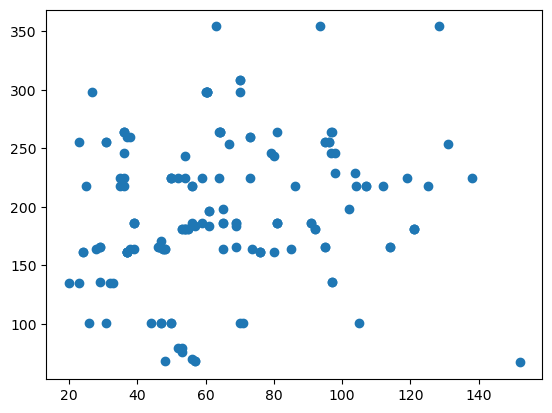

In [42]:
import matplotlib.pyplot as plt

x = df["livingArea"]
y = df["location.distance.ocean"]

plt.plot(x,y, 'o')

An interesting aspect of the data is that the price of an apartment seems unaffected by the distance to water.

## The Swedish Election of 2018
1. Calculation of the total number of legitimate votes (Giltiga Röster) in Stockholm during the election.  

In [55]:
local_file_path = "/Users/nicholas/su-mt4007/HW2/2018_R_per_kommun.csv"
df = pd.read_csv(local_file_path, sep = ';')
df.head(6)

,LÄNSKOD,KOMMUNKOD,LÄNSNAMN,KOMMUNNAMN,M,C,L,KD,S,V,...,TRP,VL-S,ÖVR,OGEJ,BLANK,OG,RÖSTER GILTIGA,RÖSTANDE,RÖSTBERÄTTIGADE,VALDELTAGANDE
0,1,14,Stockholms län,Upplands Väsby,"23,11","6,26","5,66","6,71","26,97","8,01",...,NaN,NaN,NaN,"0,04","0,69","0,06",25830,26036,30740,"84,7"
1,1,15,Stockholms län,Vallentuna,"28,29","10,11","7,73","7,58","18,91","4,47",...,0,NaN,0,"0,02","0,59","0,08",20952,21099,23438,"90,02"
2,1,17,Stockholms län,Österåker,"29,68","9,35","7,48","7,13","19,71","4,97",...,NaN,NaN,"0,01","0,03","0,69","0,13",27711,27947,31309,"89,26"
3,1,20,Stockholms län,Värmdö,"27,49","9,76","6,4","5,89","20,48","6,02",...,NaN,NaN,"0,01","0,04","0,67","0,07",28115,28335,31371,"90,32"
4,1,23,Stockholms län,Järfälla,"23,96","6,31","6,04","6,29","27,68","8,75",...,0,NaN,"0,02","0,04","0,53","0,07",45654,45948,53230,"86,32"
5,1,25,Stockholms län,Ekerö,"28,12","11,24","7,64","7,85","17,17","4,76",...,NaN,NaN,"0,01","0,01","0,64","0,08",17814,17946,19472,"92,16"


In [63]:
# Get the total number by grouping.
grouped_df = cleaned_df.groupby("LÄNSNAMN").sum()
grouped_df.head(20)

,RÖSTER GILTIGA
LÄNSNAMN,
Blekinge län,104514
Dalarnas län,188027
Gotlands län,41129
Gävleborgs län,185413
Hallands län,216982
Jämtlands län,85223
Jönköpings län,229580
Kalmar län,160864
Kronobergs län,124570


There were a total of 1.426.237 legitimate votes in Stockholm during the election.

2. The municipality the social democratic party (Social demokraterna, S) garnered the hightest voting percentage.

In [83]:
# SELECT.
cleaned_df = df[["KOMMUNNAMN", "S", "VALDELTAGANDE"]]
#cleaned_df.head(10)

# Grouping.
grouped_df = cleaned_df.groupby("KOMMUNNAMN").sum()
#grouped_df.head(10)

# Sort.
grouped_df.sort_values("S", ascending = False).head()


,S,VALDELTAGANDE
KOMMUNNAMN,,
Danderyd,"8,04","91,92"
Munkfors,"52,18","85,13"
Piteå,"47,48","89,8"
Hagfors,"47,46","84,09"
Överkalix,"46,68","85,11"


## Predicting Strokes

### A conclusion about the dataset "stroke-data.csv".